## dlbase.utils

In [8]:
import math
from typing import NamedTuple
from collections import namedtuple
from dlbase.utils.nb import TableDisplay

Log = namedtuple('Log', ['x', 'y', 'z'])
class Extra(NamedTuple):
    desc: str

table = TableDisplay(10)
for x in range(0, 20):
    table.log(Log(x, math.sin(x), math.cos(x)), Extra(f'y=sin({x}), z=cos({x})'))

| x | y | z | desc |
|-|-|-|-|
| 10 | -0.5440 | -0.8391 | y=sin(10), z=cos(10) |  
| 11 | -1.0000 | 0.0044 | y=sin(11), z=cos(11) |  
| 12 | -0.5366 | 0.8439 | y=sin(12), z=cos(12) |  
| 13 | 0.4202 | 0.9074 | y=sin(13), z=cos(13) |  
| 14 | 0.9906 | 0.1367 | y=sin(14), z=cos(14) |  
| 15 | 0.6503 | -0.7597 | y=sin(15), z=cos(15) |  
| 16 | -0.2879 | -0.9577 | y=sin(16), z=cos(16) |  
| 17 | -0.9614 | -0.2752 | y=sin(17), z=cos(17) |  
| 18 | -0.7510 | 0.6603 | y=sin(18), z=cos(18) |  
| 19 | 0.1499 | 0.9887 | y=sin(19), z=cos(19) |


## dlbase.viz

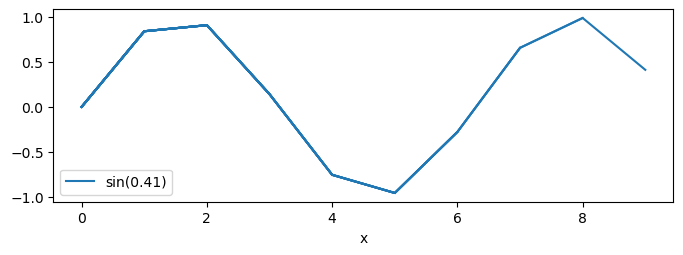

In [2]:
from dlbase.viz.board import ProgressBoard
import math

with ProgressBoard(xlabel='x') as progress_board:
    for x in range(0, 10):
        progress_board.draw(x, math.sin(x), 'sin')


## dlbase.funcs

In [3]:
from dlbase.funcs.avg import EWMA
ewma = EWMA(0.9)
for x in range(0, 10):
    print(ewma(x))


0.0
0.09999999999999998
0.2899999999999999
0.5609999999999999
0.9048999999999999
1.3144099999999999
1.7829689999999998
2.3046721
2.8742048899999997
3.4867844009999995


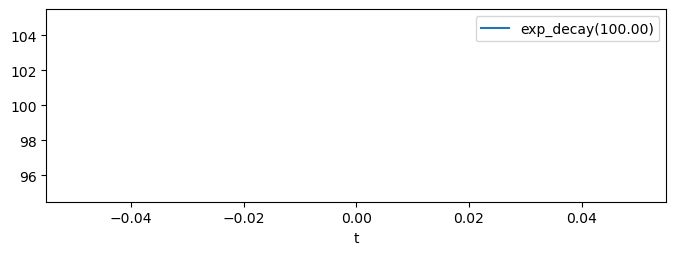

In [4]:
from dlbase.funcs.decay import ExpDecay
from dlbase.viz.board import ProgressBoard
exp_decay = ExpDecay(100, 0, 1)
with ProgressBoard(xlabel='t') as board:
    for t in range(0, 10):
        board.draw(t, exp_decay(t), 'exp_decay')


## dlbase.rl

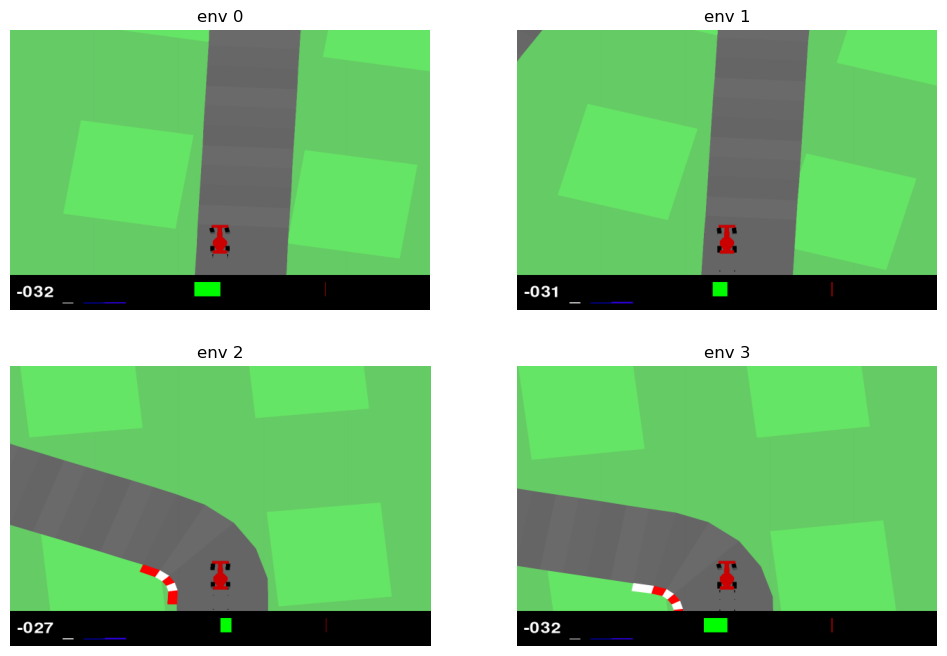

In [1]:
import gymnasium as gym
from dlbase.rl.gym import GymRunner
envs = gym.make_vec('CarRacing-v3', num_envs=4, render_mode='rgb_array')

runner = GymRunner(envs, show_env_freq=10)
runner.run()

In [5]:
from dlbase.utils.tch import cat_namedtuples, cat_dicts
from collections import deque
from typing import NamedTuple
import torch
from torch.utils.data import DataLoader
import numpy as np
import gymnasium as gym
from dlbase.rl.gym import GymRunner
from dlbase.rl.algo import TD3

class T(NamedTuple):
    a: int = 1
    b: str = 'default'
    c: float = 2.0
class T2(NamedTuple):
    x: int = 1
    y: str = 'default'

t = T(**{'b':'test', 'a':3})
t2 = T2(**{'y':'test', 'x':3})

from collections import namedtuple
TT = namedtuple('TT', t._fields + t2._fields)

tt = TT(*(t + t2))

def foo(t: int):
    print(t)

foo(tt)


TT(a=3, b='test', c=2.0, x=3, y='test')
